In [40]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('exp_result.csv', encoding='big5', index_col=0)
df = df.drop(columns=['NP預設參數'])
df

,NP最優參數,有LLM,新聞有清理,清理+RAG,清理+改進RAG
id,,,,,
2301,1.41,1.42,1.40,1.41,1.41
2308,1.84,1.74,1.65,1.62,1.68
2317,1.80,1.79,1.67,1.73,1.72
2330,1.63,3.54,3.18,3.07,3.04
2345,2.09,6.68,6.42,6.55,6.41
2356,1.58,1.57,1.59,1.58,1.56
2368,2.28,2.26,2.25,2.22,2.27
2376,1.71,1.74,1.71,1.74,1.70
2382,1.75,1.76,1.68,1.67,1.69


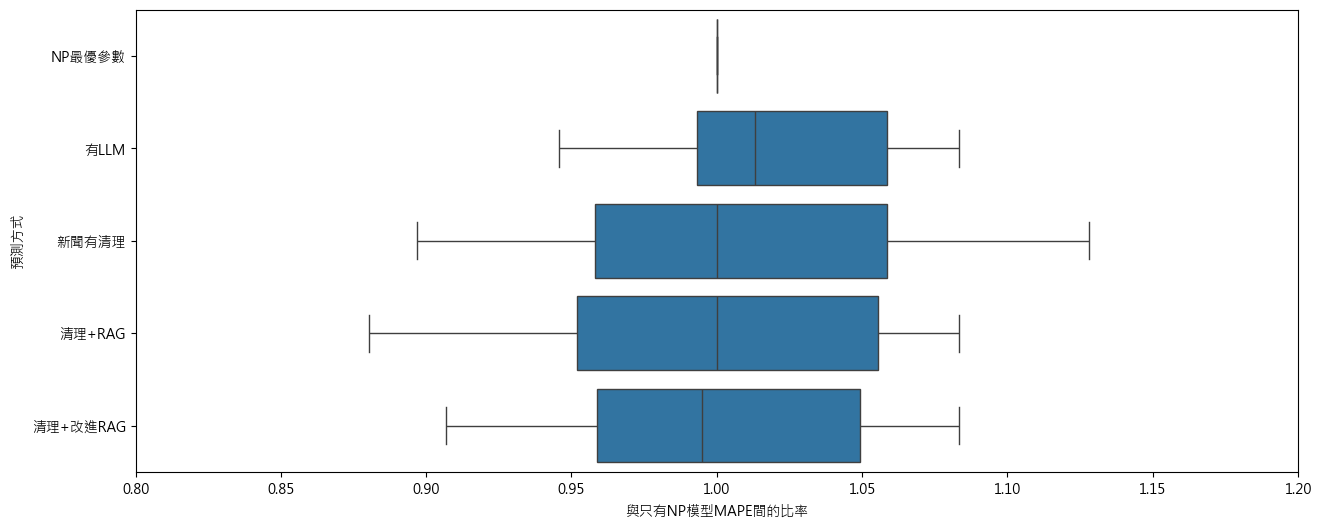

In [48]:
import seaborn as sns

df['有LLM'] = df['有LLM'] / df['NP最優參數']
df['新聞有清理'] = df['新聞有清理'] / df['NP最優參數']
df['清理+RAG'] = df['清理+RAG'] / df['NP最優參數']
df['清理+改進RAG'] = df['清理+改進RAG'] / df['NP最優參數']
df['NP最優參數'] = 1

# Melt into long format
df_melted = df.melt(var_name="Category", value_name="Value")

# Set figure size (wider and taller for clarity)
plt.figure(figsize=(15, 6))

# Horizontal box plots
sns.boxplot(
    data=df_melted,
    y="Category",  # Categories on Y-axis
    x="Value",     # Values on X-axis
    order=df.columns  # Keep original order
)
plt.xlim(0.8, 1.2)

plt.ylabel("預測方式")
plt.xlabel("與只有NP模型MAPE間的比率")
plt.title("")
plt.show()

In [16]:
df_pos = df[df['max5'] < df['no_rag']]
df = df_pos[['id', 'max5', 'no_rag']]

C:\Users\nick\AppData\Local\Temp\ipykernel_29748\1817720187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df["id"].astype(str)


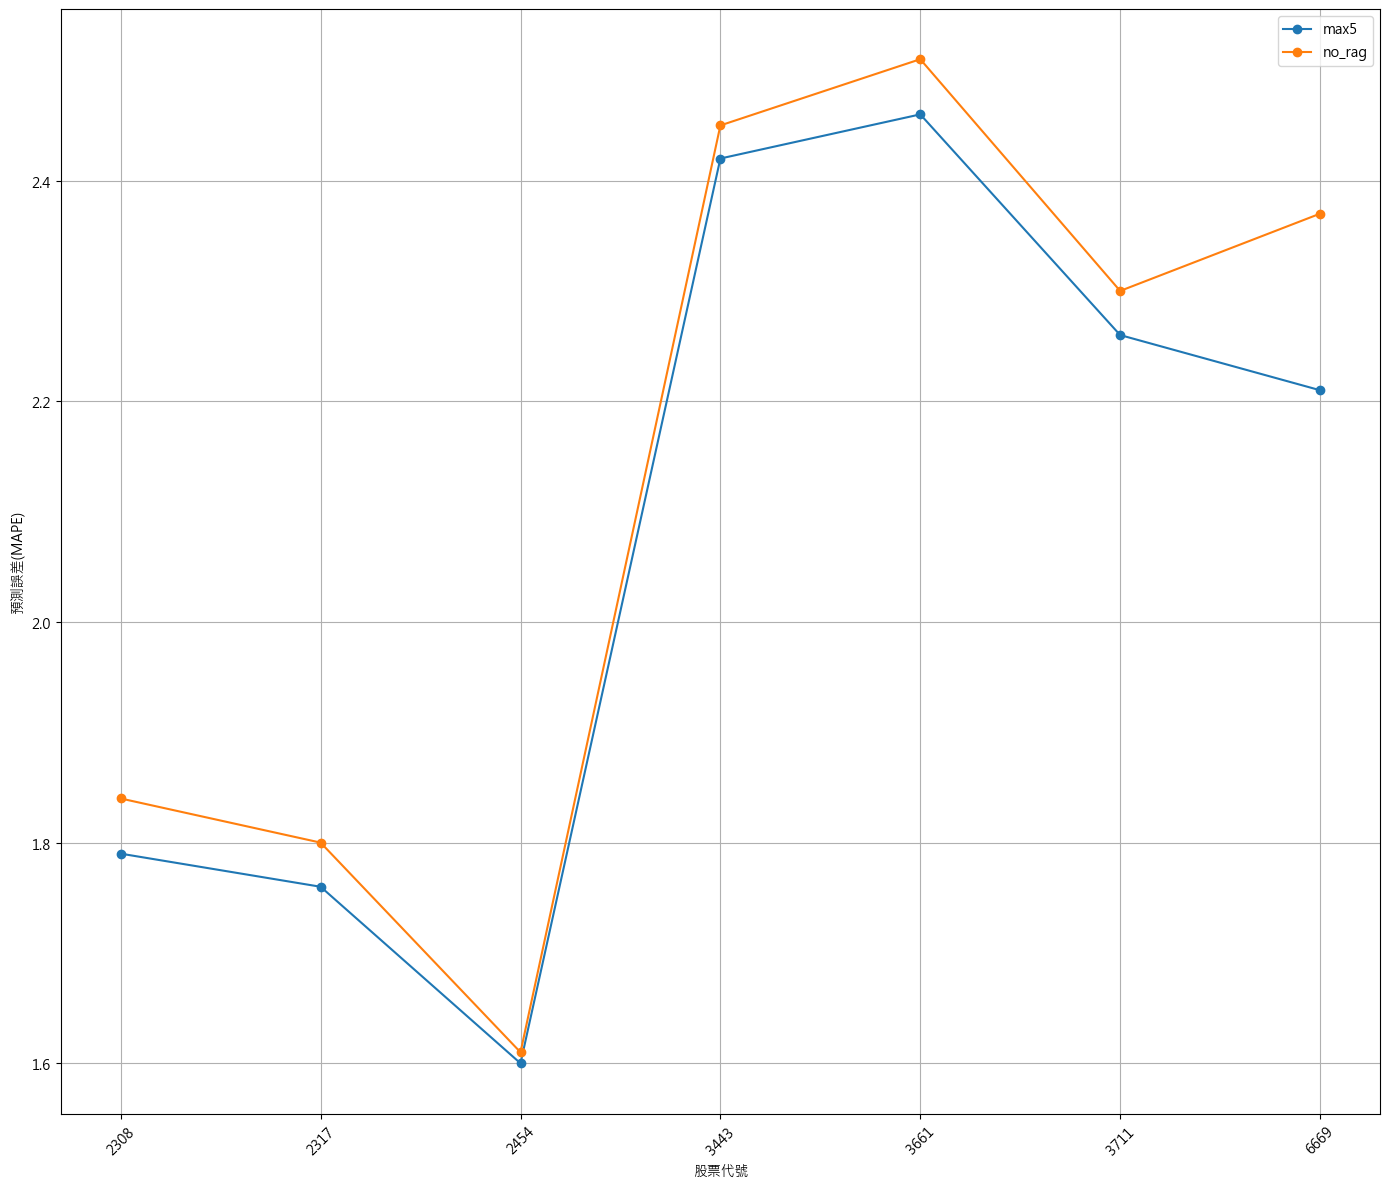

In [17]:
# Step 2: Convert id to string so matplotlib treats it as categorical
df["id"] = df["id"].astype(str)

# Step 3: Plot line chart with even spacing
plt.figure(figsize=(14, 12))

# Plot each column except 'id'
for col in df.columns[1:]:
    plt.plot(df["id"], df[col], marker="o", label=col)

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號
plt.xlabel("股票代號")
plt.ylabel("預測誤差(MAPE)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

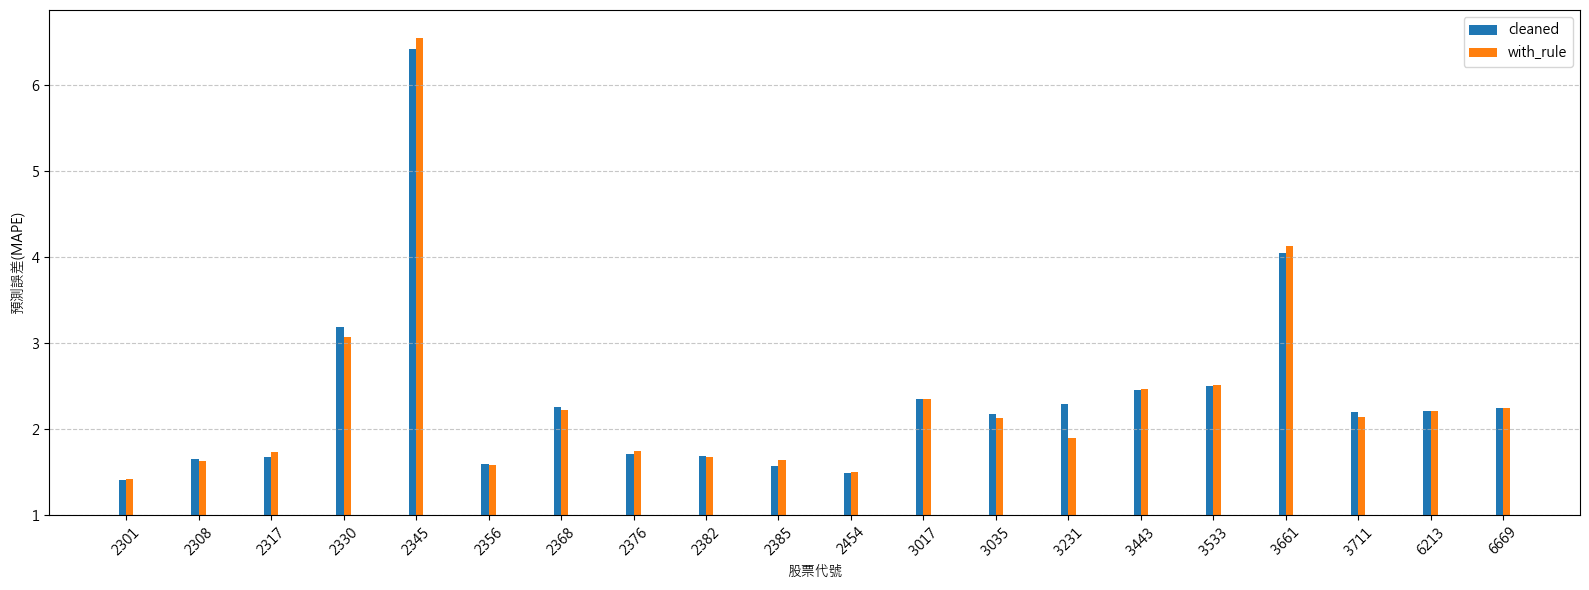

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Prepare data for grouped bar plot
columns_to_plot = df.columns[1:]  # Skip 'id' column
num_columns = len(columns_to_plot)
num_ids = len(df)

x = np.arange(num_ids)  # Group positions for each id
bar_width = 0.1

# Step 3: Plot
plt.figure(figsize=(16, 6))
for i, col in enumerate(columns_to_plot):
    plt.bar(x + i * bar_width, df[col], width=bar_width, label=col)

# Step 4: Format x-axis
plt.xticks(x + bar_width * (num_columns - 1) / 2, df["id"], rotation=45)

plt.ylim(1, None)  # Set y-axis to start from 1.0

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號
plt.xlabel("股票代號")
plt.ylabel("預測誤差(MAPE)")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

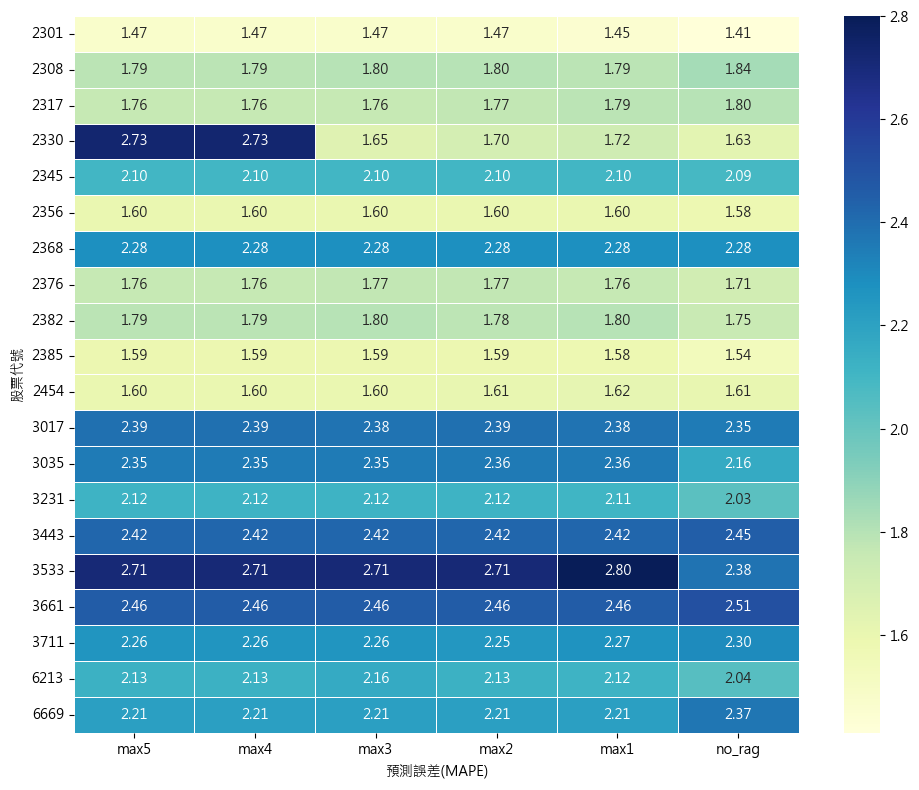

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: set id as index so it shows on Y-axis
df["id"] = df["id"].astype(str)  # Use string for better labeling
heatmap_data = df.set_index("id")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號
plt.xlabel("預測誤差(MAPE)")
plt.ylabel("股票代號")
plt.tight_layout()
plt.show()